### Student details

Student name: AKHIL RAGHU NATH

Student ID: 23048417

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [14]:
# import dependencies
import numpy as np

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [15]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data
(provided - should be completed in previous E-tivity)

In [16]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('/content/01_heights_weights_sex.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

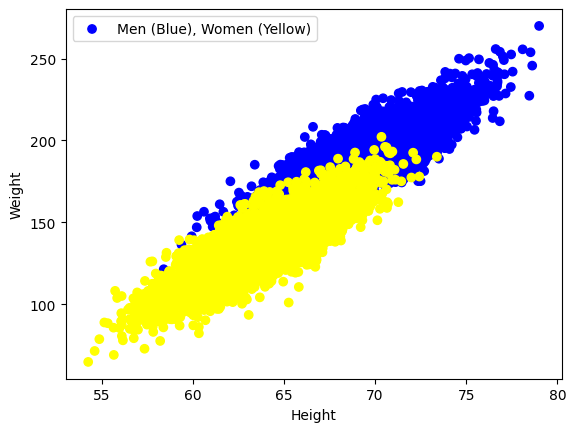

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=np.where(y == 1, 'yellow', 'blue'), label='Men (Blue), Women (Yellow)')
plt.legend()

plt.xlabel('Height')
plt.ylabel('Weight')

# Show the plot
plt.show()

### Train/Test Split
(provided - should be completed in previous E-tivity)

In [18]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Train the algorithm (Task)

In [19]:
ppn = Perceptron(epochs=50, eta=0.1)

ppn.train(X_train, y_train)

### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [20]:
from sklearn.metrics import accuracy_score
predict =ppn.predict(X_test)
accuracy_score=accuracy_score(predict,y_test)
print(accuracy_score)

0.8545454545454545


### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable


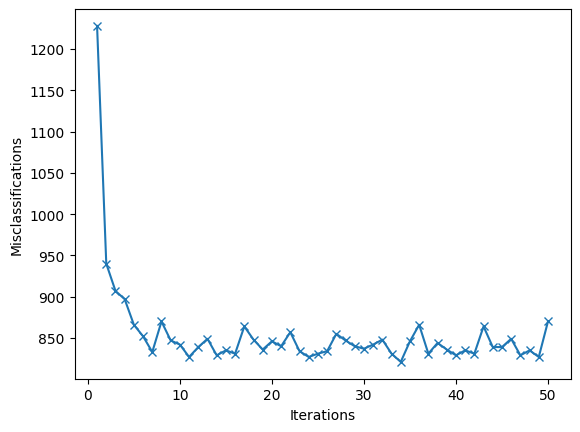

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='x')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

Weights: [  15.6         880.80617429 -341.46385195]


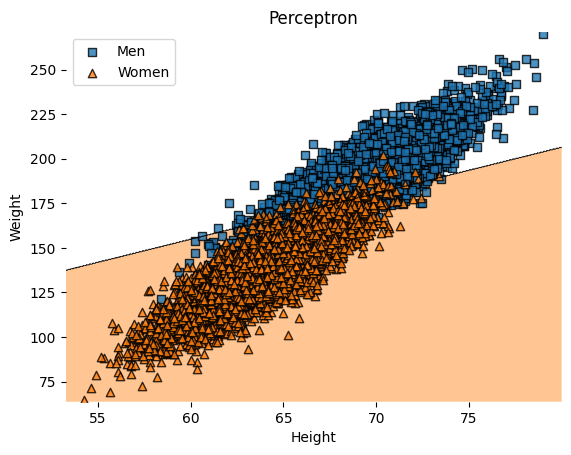

In [22]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions

print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn, legend=1)
plt.title('Perceptron')
plt.xlabel('Height')
plt.ylabel('Weight')
L = plt.legend()
L.get_texts()[0].set_text('Men')
L.get_texts()[1].set_text('Women')
plt.show()


2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

In [23]:
np.random.seed(0)
new_height =np.random.uniform(54,80,10000)
new_weight= np.random.uniform(64,269,10000)
X_data = np.column_stack((new_height, new_weight))
new_predict=ppn.predict(X_data)
X_data_predict = np.column_stack((X_data, new_predict))
#print(X_data_predict[:4, :])

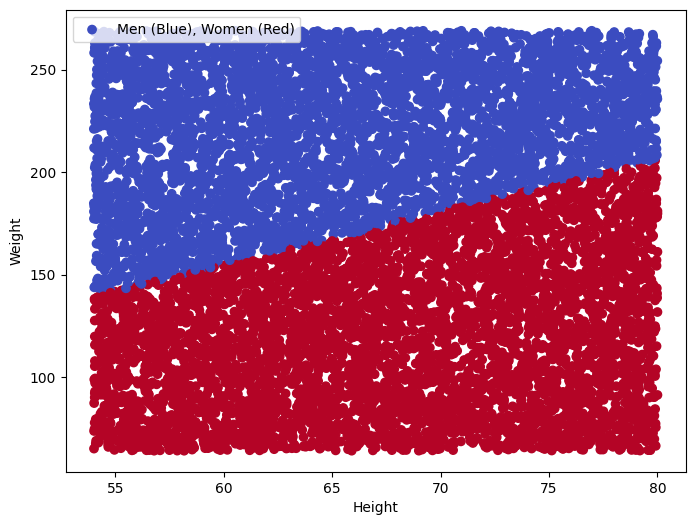

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(X_data_predict[:, 0], X_data_predict[:, 1], c=X_data_predict[:, 2], cmap='coolwarm', marker='o', label='Men (Blue), Women (Red)')

# Set labels and legend
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses?
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
3.	Why can’t we get zero error with this data?


1.There is some seperation between gender in plot and as well as there is some overlap as we can see in the map.so ML model will try to classify this, since there are overlaps  misclassification happens and it results in error,As the training progress it tries to distinguish between classes and misclassification continues.

2.No we dont arrive at the very best solution at last epoch.There is no a certian epoch with lower error.Since the model will try to classify and it cannot distinguish some values into which class it fits so the misclassification repeats and unable to lower the error

3.Since there are some datas in which we cannot clearly distinguish which class it has to consider,we cannot classify the entire data correctly.so we cant get zero error with this data.

Create a copy of the Perceptron class, and rename it to something reasonable, like PerceptronEE. Implement an early exit, to exit the training once convergence has been achieved, i.e. once the error is at an acceptable level.

In [25]:

# creating a copy fo perceptron class perceptronEE with a tolerance value
class PerceptronEE(object):

    def __init__(self, eta=0.01, epochs=50,tol=850):
        self.eta = eta
        self.epochs = epochs
        self.tol = tol

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
           # if the errors are less than tolerance value it will exit
            if errors < self.tol:
                break
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Training the algorithm

In [26]:
# Taking the tolerance or accepted error value as 850
ppnEE = PerceptronEE(epochs=50, eta=0.1,tol=850)
ppnEE.train(X_train, y_train)

ppn_errors [1228, 940, 907, 897, 866, 852, 833]


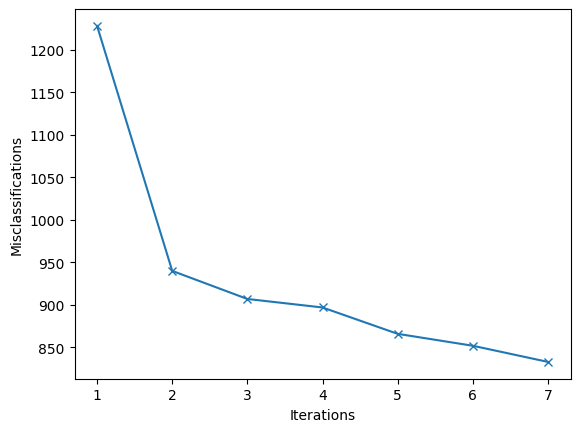

In [27]:
plt.plot(range(1, len(ppnEE.errors_)+1), ppnEE.errors_, marker='x')
print("ppn_errors",ppnEE.errors_)
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

Here we have taken accepted level of errors as 850